In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [0,1,2,3]
y = [0,1,2,3]

In [3]:
x1 = np.linspace(0,3.,30)

In [4]:
Poly = ( lambda x: x, lambda x: x**4 - 6*x**3 + 11*x**2 - 5*x, lambda x: x + np.sin(2*np.pi*x)) 
Label = ['1','2','3']

In [5]:
print(len(Poly))

3


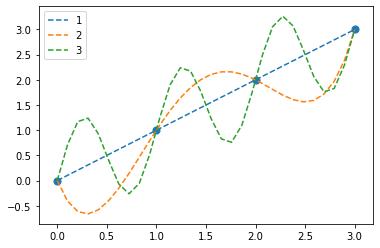

In [6]:
for p,l in zip(Poly,Label):
    plt.plot(x1,p(x1),'--', label=l)

plt.scatter(x,y,marker='o',s=50)
plt.legend(loc=0)

In [7]:
# Queremos trabajar con funciones suaves, sin discontinuidades y con expresiones analíticas conocidas. Polinomios

In [8]:
theta = 20.*np.pi/180.
v0 = 10.
g = 9.8

def f(x):
    
    a = - g/(2*(v0*np.cos(theta))**2)
    b = np.tan(theta)
    c = 0.
    
    return a*x**2 + b*x + c

In [9]:
x = np.linspace(0,7.,11)
y = f(x)

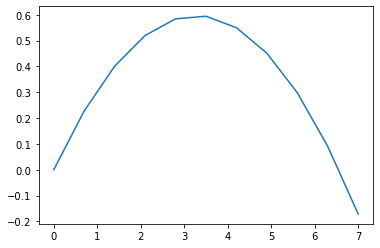

In [10]:
plt.plot(x,y)

In [11]:
for i,j in zip(x,y):
    print(i,j)

0.0 0.0
0.7 0.22758845528866428
1.4 0.4007954931819738
2.0999999999999996 0.5196211136799285
2.8 0.5840653167825287
3.5 0.594128102489774
4.199999999999999 0.5498094708016645
4.8999999999999995 0.45110942171820034
5.6 0.29802795523938164
6.3 0.09056507136520775
7.0 -0.17127922990432065


In [12]:
xt = np.array([1.4,3.5,5.6])
yt = np.array([0.4007,0.5941,0.2980])

In [13]:
M = np.zeros((3,3))
M[:,0] = xt**2
M[:,1] = xt
M[:,2] = 1

print(M)

[[ 1.96  1.4   1.  ]
 [12.25  3.5   1.  ]
 [31.36  5.6   1.  ]]


In [14]:
sol = np.linalg.solve(M,yt)
print(sol)

[-5.54988662e-02  3.64039683e-01 -1.77777778e-04]


In [15]:
angle = np.arctan(sol[1])

In [16]:
velocity = np.sqrt(  - g/(2*sol[0]*np.cos(angle)**2)  )

In [17]:
print(angle*180/np.pi,velocity)

20.00351354908197 9.999536323883067


In [18]:
# Usando la interpolacion de lagrange el término cuadratico y lineal es:

def Linearlagrange2(a,b,c,fa,fb,fc):
    return -(b+c)*fa/((a-b)*(a-c)) -(a+c)*fb/((b-a)*(b-c)) -(a+b)*fc/((c-a)*(c-b)) 

def Quadraticlagrange2(a,b,c,fa,fb,fc):
    return fa/((a-b)*(a-c)) + fb/((b-a)*(b-c)) + fc/((c-a)*(c-b)) 

In [19]:
tanangle = Linearlagrange2(xt[0],xt[1],xt[2],yt[0],yt[1],yt[2])
x2 = Quadraticlagrange2(xt[0],xt[1],xt[2],yt[0],yt[1],yt[2])

In [20]:
angle = np.arctan(tanangle)
velocity = np.sqrt(  - g/(2*x2*np.cos(angle)**2)  )
print(angle*180/np.pi,velocity)

20.003513549081962 9.999536323883069
